In [1]:
import pandas as pd
import os

In [2]:
abstract_df = pd.read_csv('../../clean_data/all_abstract.csv', index_col=0)

In [3]:
abstract = abstract_df.copy()

In [4]:
abstract_text_vectors = abstract[['goal_name_key_pos', 'abstract', 'subject', 'certain']]
abstract_features = abstract.drop(columns=['goal_first_step', 'default_goal_type', 'goal_domain_key_pos', 'goal_name_key_pos'])

In [5]:
from sklearn.model_selection import train_test_split

#### Features approach

In [6]:
abstract_features = abstract_features.drop(columns=['subject', 'certain'])

In [7]:
X = abstract_features.drop('abstract', axis=1)
y = abstract_features['abstract']

In [8]:
X.shape

(17118, 13)

In [9]:
y.shape

(17118,)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
X_train.head()

,is_questioned,are_first_steps_known,is_time_certain,is_certainly_imagined,are_obstackles_expected,goal_weight,goal_words,goal_verbs_counter,goal_nouns_counter,goal_numr_counter,goal_adj_counter,goal_digit_counter,goal_aver_word_len
11336,0,0,0,0,1,1.0034,2,0,2,0,0,0,10.00
1786,0,1,1,1,0,0.0065,2,0,1,0,1,0,11.00
2008,0,1,0,1,0,0.0082,1,0,1,0,0,0,14.00
17498,1,1,0,1,1,0.0055,3,1,1,0,1,0,10.33
4958,0,1,0,1,1,0.0375,3,0,3,0,0,0,8.33


In [12]:
from sklearn.preprocessing import MinMaxScaler

In [13]:
mms = MinMaxScaler()

In [14]:
X_train_scaled = mms.fit_transform(X_train)

In [15]:
# X_train_scaled

In [16]:
X_test_scaled = mms.fit_transform(X_test)

In [17]:
from xgboost import XGBClassifier

In [18]:
abstract_abs_xgb = XGBClassifier()

In [19]:
abstract_abs_xgb.fit(X_train_scaled, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [20]:
y_pred = abstract_abs_xgb.predict(X_test_scaled)

In [21]:
from sklearn.metrics import classification_report, accuracy_score, f1_score, roc_auc_score

In [22]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.57      0.63      0.60      1938
           1       0.45      0.38      0.41      1486

    accuracy                           0.53      3424
   macro avg       0.51      0.51      0.51      3424
weighted avg       0.52      0.53      0.52      3424



In [23]:
accuracy_score(y_test, y_pred)

0.5257009345794392

In [24]:
f1_score(y_test, y_pred)

0.4128705712219812

In [25]:
roc_auc_score(y_test, y_pred)

0.5092059774961908

#### Vectors approach

In [26]:
abstract_vectors = abstract_text_vectors.drop(columns=['subject', 'certain'])

In [27]:
abstract_vectors.dropna(inplace=True)

In [28]:
abstract_vectors.columns

Index(['goal_name_key_pos', 'abstract'], dtype='object')

In [29]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [30]:
text = abstract_vectors['goal_name_key_pos']
y = abstract_vectors['abstract']

In [31]:
text

0                              отстать поезд современность
1                                           самореализация
2                                              образ жизнь
3                         обновление устаревший информация
4                          повышение результативность труд
                               ...                        
18013    приобретение новый знание навык успешный обуче...
18014                             быть нужный работодатель
18016                                   сохранить здоровье
18018                                  зарабатывать деньга
18019                                      получение навык
Name: goal_name_key_pos, Length: 16953, dtype: object

In [32]:
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(text)

In [33]:
X.shape

(16953, 4600)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [35]:
X_train

<13562x4600 sparse matrix of type '<class 'numpy.float64'>'
	with 47219 stored elements in Compressed Sparse Row format>

In [36]:
abstract_abs_v_xgb = XGBClassifier()

In [37]:
abstract_abs_v_xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [38]:
y_pred = abstract_abs_v_xgb.predict(X_test)

In [39]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.56      0.86      0.68      1900
           1       0.45      0.15      0.23      1491

    accuracy                           0.55      3391
   macro avg       0.51      0.50      0.45      3391
weighted avg       0.52      0.55      0.48      3391



In [40]:
accuracy_score(y_test, y_pred)

0.5467413742258921

In [41]:
f1_score(y_test, y_pred)

0.22880080280983445

In [42]:
roc_auc_score(y_test, y_pred)

0.5043534893571958

#### Neural net approach

In [43]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Embedding,Dropout
from tensorflow.keras.layers import Conv1D, MaxPooling1D, GlobalMaxPooling1D 

In [44]:
text = abstract_vectors['goal_name_key_pos']
y = abstract_vectors['abstract']

In [45]:
token = Tokenizer()
token.fit_on_texts(text)

In [46]:
vocab_size = len(token.word_index) + 1
vocab_size

4619

In [47]:
# print(token.word_index)

In [48]:
encoded_text = token.texts_to_sequences(text)

In [49]:
# print(encoded_text)

In [50]:
max_len = int()
for i in encoded_text:
    len_ = len(i)
    if len_ > max_len:
        max_len = len_
        
max_len

127

In [51]:
max_length = 127
X = pad_sequences(encoded_text, maxlen=max_length, padding='post')

In [52]:
X.shape

(16953, 127)

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [54]:
vec_size = 127

model = Sequential()
model.add(Embedding(vocab_size, vec_size, input_length=max_length))

model.add(Conv1D(32, 2, activation='relu'))
model.add(MaxPooling1D(2))
model.add(Dropout(0.5))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(16, activation='relu'))

model.add(GlobalMaxPooling1D())

model.add(Dense(1, activation='sigmoid'))

In [55]:
%%time
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Wall time: 73.8 ms


In [56]:
import numpy as np

In [57]:
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)
X_test= np.asarray(X_test)
y_test = np.asarray(y_test)

In [58]:
from tensorflow.keras.callbacks import EarlyStopping

In [59]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [60]:
model.fit(X_train, y_train, epochs=600, validation_data=(X_test, y_test), callbacks=[early_stop])

Train on 13562 samples, validate on 3391 samples
Epoch 1/600
13562/13562 [==============================] - 9s 695us/sample - loss: 0.6872 - accuracy: 0.5571 - val_loss: 0.6887 - val_accuracy: 0.5603
Epoch 2/600
13562/13562 [==============================] - 9s 638us/sample - loss: 0.6869 - accuracy: 0.5598 - val_loss: 0.6884 - val_accuracy: 0.5603
Epoch 3/600
13562/13562 [==============================] - 9s 643us/sample - loss: 0.6864 - accuracy: 0.5602 - val_loss: 0.6883 - val_accuracy: 0.5597
Epoch 4/600
13562/13562 [==============================] - 8s 617us/sample - loss: 0.6836 - accuracy: 0.5591 - val_loss: 0.6893 - val_accuracy: 0.5553
Epoch 5/600
13562/13562 [==============================] - 8s 619us/sample - loss: 0.6767 - accuracy: 0.5703 - val_loss: 0.6928 - val_accuracy: 0.5420
Epoch 6/600
13562/13562 [==============================] - 9s 644us/sample - loss: 0.6628 - accuracy: 0.5879 - val_loss: 0.6978 - val_accuracy: 0.5341
Epoch 7/600
13562/13562 [====================

In [61]:
losses = pd.DataFrame(model.history.history)

In [62]:
losses[['accuracy','val_accuracy']].plot()

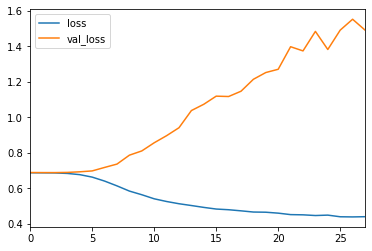

In [63]:
losses[['loss','val_loss']].plot()

In [64]:
print(model.metrics_names)
print(model.evaluate(X_test,y_test,verbose=0))

['loss', 'accuracy']
[1.4917118764317376, 0.5199056]


In [65]:
y_pred = model.predict_classes(X_test)

In [66]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.55      0.74      0.63      1900
           1       0.42      0.24      0.30      1491

    accuracy                           0.52      3391
   macro avg       0.49      0.49      0.47      3391
weighted avg       0.49      0.52      0.49      3391



In [67]:
accuracy_score(y_test, y_pred)

0.5199056325567679

In [68]:
f1_score(y_test, y_pred)

0.30308219178082196

In [69]:
roc_auc_score(y_test, y_pred)

0.48950174732606166